<a href="https://colab.research.google.com/github/Paras-ai/Aerofit/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Import the dataset and do usual data analysis steps like checking the structure &
#characteristics of the dataset
#○ The data type of all columns in the “customers” table.

In [2]:
import pandas as pd
df= pd.read_csv('aerofit.csv')
print(df.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [3]:
#You can find the number of rows and columns given in the dataset

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 180 rows and 9 columns.


In [ ]:
#○ Check for the missing values and find the number of missing values in each column

In [ ]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
No null in any columns

In [ ]:
#2. Detect Outliers
#○ Find the outliers for every continuous variable in the dataset

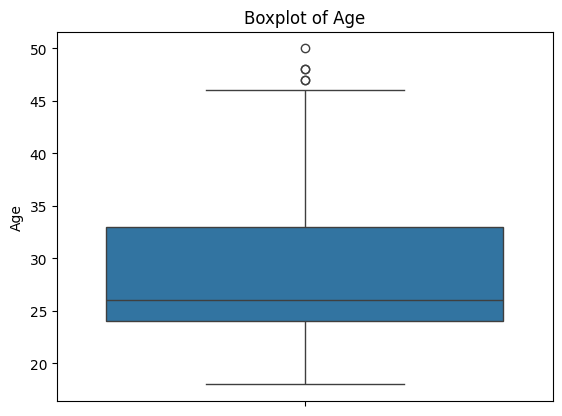

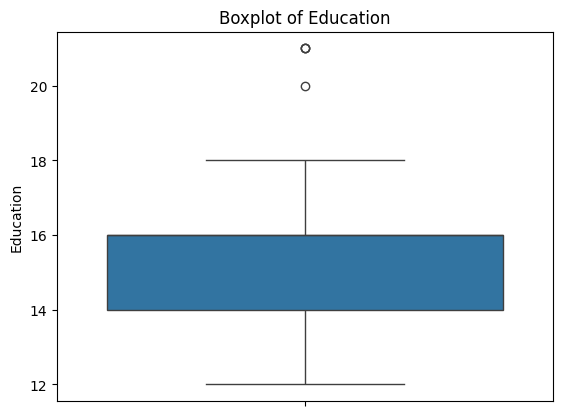

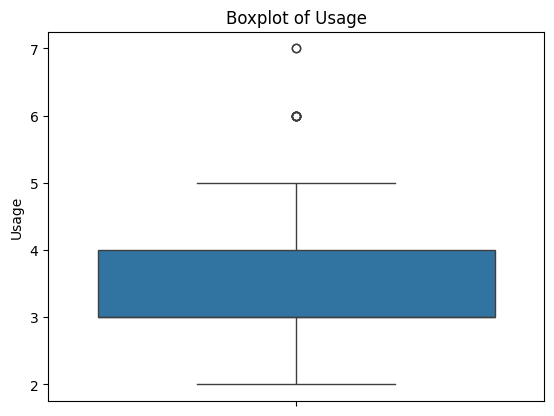

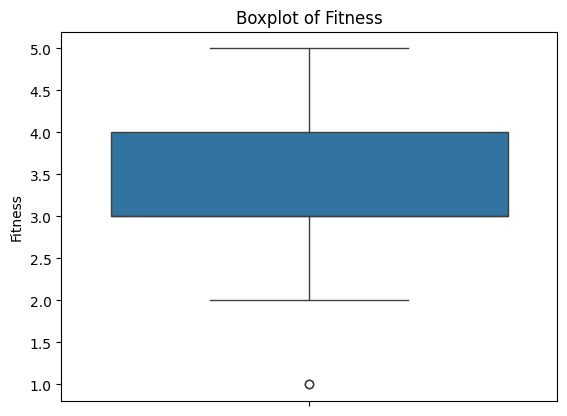

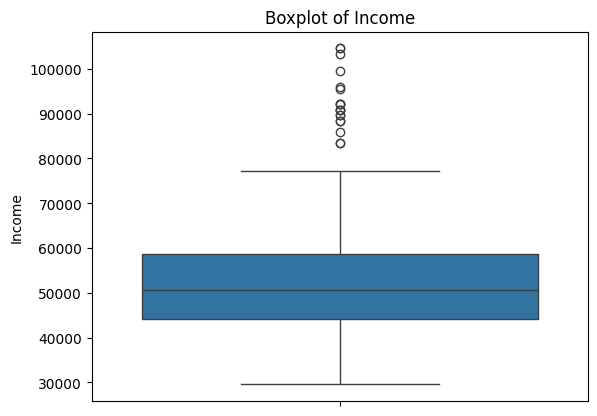

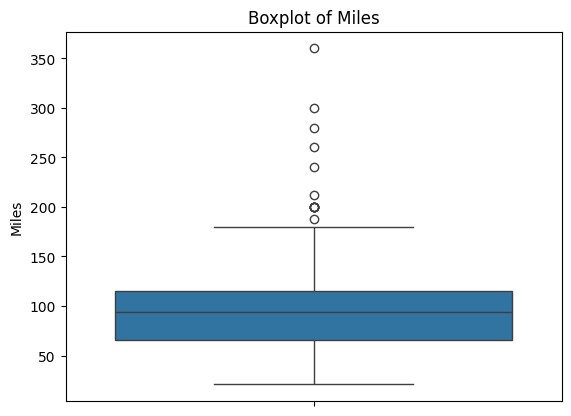


 Outliers found using IQR method:

Age: 5 outliers
[47 50 48 47 48]
Education: 4 outliers
[20 21 21 21]
Usage: 9 outliers
[6 6 6 7 6 7 6 6 6]
Fitness: 2 outliers
[1 1]
Income: 19 outliers
[ 83416  88396  90886  92131  88396  85906  90886 103336  99601  89641
  95866  92131  92131 104581  83416  89641  90886 104581  95508]
Miles: 13 outliers
[188 212 200 200 200 240 300 280 260 200 360 200 200]


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplots to visualize outliers
for column in df_continuous_columns:
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# Function to find outliers using IQR
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Print outliers for each column
print("\n Outliers found using IQR method:\n")
for column in df_continuous_columns:
    outliers = find_outliers(df, column)
    if not outliers.empty:
        print(f"{column}: {len(outliers)} outliers")
        print(outliers[column].values)
    else:
        print(f"{column}: No outliers")



In [ ]:
Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
import numpy as np
# Clipping each continuous column between its 5th and 95th percentiles
for column in df_continuous_columns:
    lower = df[column].quantile(0.05)
    upper = df[column].quantile(0.95)
    df[column] = np.clip(df[column], lower, upper)
    print(f" Clipped {column} between {round(lower, 2)} and {round(upper, 2)}")


 Clipped Age between 20.0 and 43.0
 Clipped Education between 14.0 and 18.0
 Clipped Usage between 2.0 and 5.0
 Clipped Fitness between 2.0 and 5.0
 Clipped Income between 34107.16 and 90889.11
 Clipped Miles between 47.0 and 200.0


In [ ]:
3. Check if features like marital status, Gender, and age have any effect on the product
purchased
○ Find if there is any relationship between the categorical variables and the output
variable in the data.

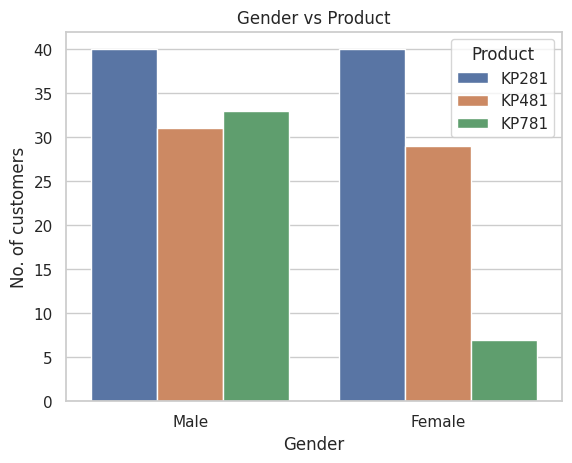

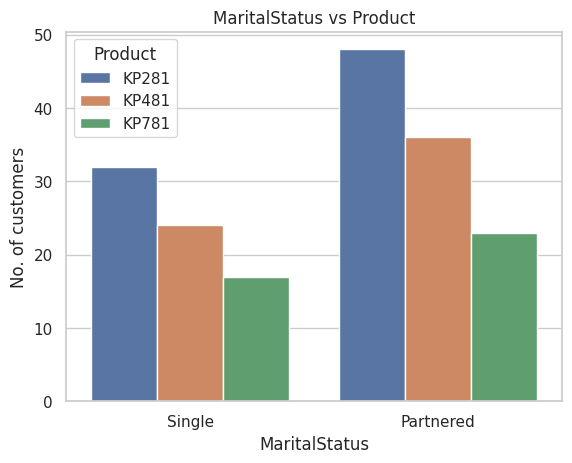

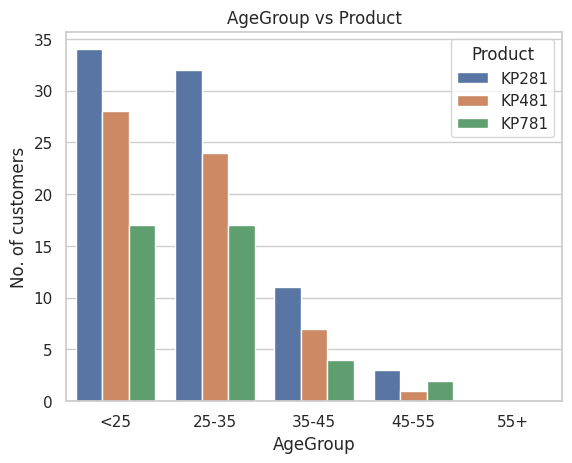

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv('aerofit.csv')
df['AgeGroup']=pd.cut(df['Age'],bins=[0,25,35,45,55,100],labels=['<25','25-35','35-45','45-55','55+'])
features=['Gender','MaritalStatus','AgeGroup']
for feature in features:
  plt.figure()
  sns.countplot(x=feature,data=df, hue='Product')
  plt.title(f'{feature} vs Product')
  plt.xlabel(feature)
  plt.ylabel('No. of customers')
  plt.legend(title='Product')
  plt.show()

In [ ]:
kp281 is the most preferred by both male and female. kp781 is more preffered than kp481 by male, kp781 is preferred more by married people
Customers with age below 25 are the ones who is using the products the most with kp281 being used the maximum

In [15]:
○ Find if there is any relationship between the continuous variables and the output variable in the data.

SyntaxError: invalid character '○' (U+25CB) (<ipython-input-15-a35e6bd47598>, line 1)

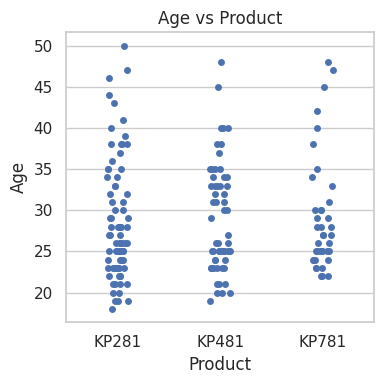

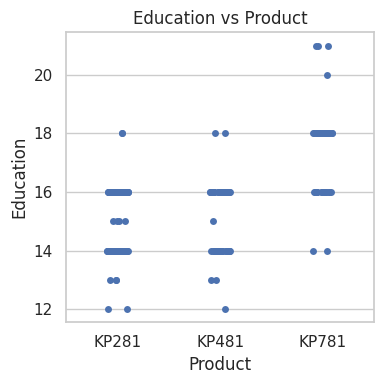

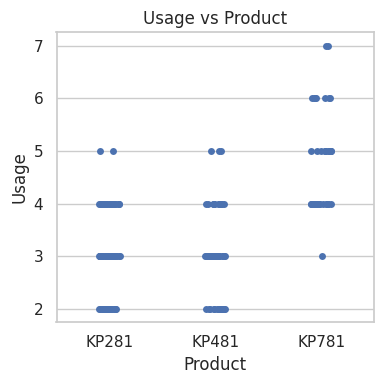

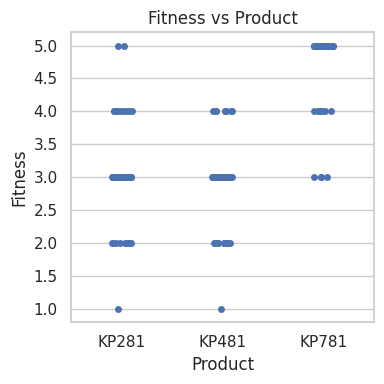

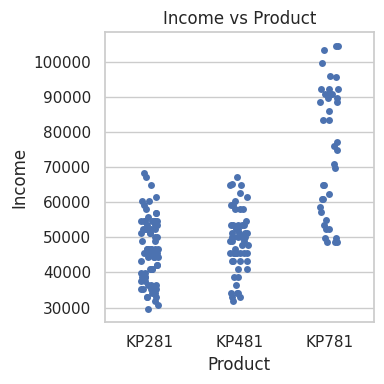

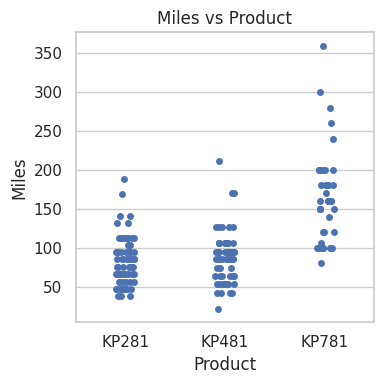

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("aerofit.csv")

# Identify continuous (numeric) variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Output variable
output_var = 'Product'

# Set up the plot style
sns.set(style="whitegrid")

# Loop through each numeric column and plot against Product
for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.stripplot(x=output_var, y=col, data=df, jitter=True)
    plt.title(f'{col} vs {output_var}')
    plt.xlabel('Product')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [ ]:
This strip plot showing how the values are distributed across different products (KP281, KP481, KP781)
Helps you spot patterns, e.g., which product tends to be bought by younger people or higher-income customers
kp781 is preferred by high income people and all 3 products majorly getting preferred by young people. High education people preferring kp781 product.

In [ ]:
4. Representing the Probability
○ Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)

In [11]:
import pandas as pd
df = pd.read_csv("aerofit.csv")

product_prob= pd.crosstab(index=df['Product'],columns='Count',normalize=True)*100
product_prob.round(2)
print("📊 Marginal Probability (Percentage of Customers by Product):")
print(product_prob)

📊 Marginal Probability (Percentage of Customers by Product):
col_0        Count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


In [ ]:
○ Find the probability that the customer buys a product based on each column.

In [ ]:
import pandas as pd
df = pd.read_csv("aerofit.csv")

feature_columns = []  # Create an empty list to store column names
for col in df.columns:
    if col != 'Product':  # If the column is not 'Product'
        feature_columns.append(col)

# Loop through each feature and compute conditional probability with respect to Product
for col in feature_columns:
    print(f"\n Conditional Probability of Product given '{col}':\n")
    prob_table = pd.crosstab(index=df[col], columns=df['Product'], normalize='index') * 100
    print(prob_table.round(2))


 Conditional Probability of Product given 'Age':

Product   KP281  KP481   KP781
Age                           
18       100.00   0.00    0.00
19        75.00  25.00    0.00
20        40.00  60.00    0.00
21        57.14  42.86    0.00
22        57.14   0.00   42.86
23        44.44  38.89   16.67
24        41.67  25.00   33.33
25        28.00  44.00   28.00
26        58.33  25.00   16.67
27        42.86  14.29   42.86
28        66.67   0.00   33.33
29        50.00  16.67   33.33
30        28.57  28.57   42.86
31        33.33  50.00   16.67
32        50.00  50.00    0.00
33        25.00  62.50   12.50
34        33.33  50.00   16.67
35        37.50  50.00   12.50
36       100.00   0.00    0.00
37        50.00  50.00    0.00
38        57.14  28.57   14.29
39       100.00   0.00    0.00
40        20.00  60.00   20.00
41       100.00   0.00    0.00
42         0.00   0.00  100.00
43       100.00   0.00    0.00
44       100.00   0.00    0.00
45         0.00  50.00   50.00
46       100.00   0

In [ ]:
Find the conditional probability that an event occurs given that another event has
occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)

In [ ]:
import pandas as pd
df = pd.read_csv("aerofit.csv")

# Calculate conditional probability: P(Product | Gender)
gender_product_prob = pd.crosstab(index=df['Gender'], columns=df['Product'], normalize='index') * 100

# Display probabilities
print("📊 Conditional Probability of Product given Gender:\n")
print(gender_product_prob.round(2))

# Specific probability: P(KP481 | Female)
prob_kp481_given_female = gender_product_prob.loc['Female', 'KP481']
print(f"\n✅ Probability that a customer will purchase KP481 given they are Female: {prob_kp481_given_female:.2f}%")

In [ ]:
5. Check the correlation among different factors
○ Find the correlation between the given features in the table

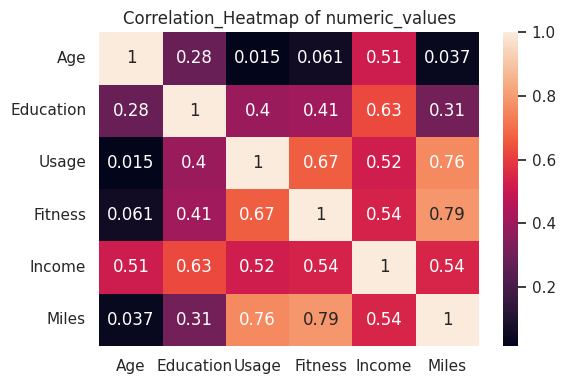

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("aerofit.csv")

corr_mat = df.corr(numeric_only=True)
#heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation_Heatmap of numeric_values')
plt.tight_layout()
plt.show()

In [ ]:
Strong relationships
Fitness and Miles (0.79) : People who rate themselves as more fit tend to accumulate more miles using the equipment — likely due to higher physical activity.
Usage and Miles (0.76) : The more frequently a customer uses the equipment, the more total miles they log — a direct and expected relationship.
Usage and Fitness (0.67) : Increased usage of the product is strongly associated with higher self-rated fitness.

Weak relationships-
Usage and Age (0.015) : There’s no meaningful relationship between a customer’s age and how often they use the product.
Miles and Age (0.037): Age doesn't influence total miles logged, suggesting older and younger customers use the equipment similarly in terms of distance.
Age and Fitness (0.061) : No significant correlation between age and fitness level — possibly because fitness is influenced more by lifestyle than age.


In [ ]:
6. Customer profiling and recommendation
○ Make customer profilings for each and every product. Write a detailed recommendation from the analysis that you have done.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('aerofit.csv')

kp281_buyers=df[df['Product'] == 'KP281']

print("\n  KP281 Buyers - Age & Income ")
print(kp281_buyers[['Age','Income']].describe())

print("\n KP281 Buyers - Gender")
print(kp281_buyers['Gender'].value_counts(normalize=True)*100)

print(" \n KP281 Buyers - MaritalStatus")
print(kp281_buyers['MaritalStatus'].value_counts(normalize=True))

# the same analysis can be done for kp481 and kp781



  KP281 Buyers - Age & Income 
             Age       Income
count  80.000000     80.00000
mean   28.550000  46418.02500
std     7.221452   9075.78319
min    18.000000  29562.00000
25%    23.000000  38658.00000
50%    26.000000  46617.00000
75%    33.000000  53439.00000
max    50.000000  68220.00000

 KP281 Buyers - Gender
Gender
Male      50.0
Female    50.0
Name: proportion, dtype: float64
 
 KP281 Buyers - MaritalStatus
MaritalStatus
Partnered    0.6
Single       0.4
Name: proportion, dtype: float64


In [ ]:
Findings — example- KP281 Customer Profile Summary:
Most KP281 buyers are between 23 and 33 years old.
Gender: Equal females and  males buy KP281 (e.g., 50% Female, 50% Male).
Income: Buyers typically fall in the $29,000–$55,000 income range.
Marital Status: Majority are partnered (e.g., 60% Partnered, 40% Single)
Similar analysis can be done for kp481 and kp781
recommendation-
kp281 is recommended for low income partnered people irrespective of gender(male/female equal)
kp481 is reommended for medium income partnered male
kp781 is recommended for high income partnered male